In [65]:
pip install textblob


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --- ------------------------------------ 61.4/626.3 kB 1.7 MB/s eta 0:00:01
   --------- ------------------------------ 143.4/626.3 kB 2.1 MB/s eta 0:00:01
   --------- ------------------------------ 143.4/626.3 kB 2.1 MB/s eta 0:00:01
   -------------------------------- ------- 512.0/626.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.7 MB/s eta 0:00:00


In [66]:
import numpy as np
import pandas as pd
import string
import re
import nltk
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report
from textblob import TextBlob
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\kurap\OneDrive\Documents\data science\blogs.csv',encoding = "ISO-8859-1")

In [3]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [4]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [5]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text
clean = lambda x: clean_text(x)

In [8]:
df['Data']=df.Data.apply(clean)
df.Data

0       path \nfrom  frank odwyer\nnewsgroups altathei...
1       newsgroups altatheism\npath \nfrom bilokcforum...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path \nfrom jbrownbatmanbmdtrwcom\nnewsgroups ...
4       xref cantaloupesrvcscmuedu   \nnewsgroups alta...
                              ...                        
1995    xref cantaloupesrvcscmuedu   \npath \nfrom  fr...
1996    xref cantaloupesrvcscmuedu   \nnewsgroups talk...
1997    xref cantaloupesrvcscmuedu  \npath cantaloupes...
1998    xref cantaloupesrvcscmuedu  \npath cantaloupes...
1999    xref cantaloupesrvcscmuedu    \npath \nfrom ri...
Name: Data, Length: 2000, dtype: object

In [9]:
freq = pd.Series(' '.join(df['Data']).split()).value_counts()[:20]
freq

the     26780
to      13429
of      12697
a       11214
and     10863
in       9068
i        8155
is       7970
that     7092
it       5509
for      5147
you      4824
from     4035
on       3881
this     3536
be       3446
not      3434
have     3242
with     3218
are      3192
dtype: int64

In [10]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Data'] = df['Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [11]:
df.shape

(2000, 2)

In [12]:
freq_Sw = pd.Series(' '.join(df['Data']).split()).value_counts()[:20] # for top 20
freq_Sw

subject         2170
lines           2086
date            2083
path            2046
newsgroups      2038
messageid       2006
organization    1979
apr             1940
gmt             1785
one             1588
would           1580
writes          1523
article         1293
references      1282
dont            1189
people          1093
sender          1082
university      1068
like            1060
know            1007
dtype: int64

In [13]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(df["Data"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [14]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aa,9,0.000029
1,aaa,3,0.000010
2,aaaaarrrrgh,1,0.000003
3,aaboston,1,0.000003
4,aalternate,1,0.000003
5,aaltonen,3,0.000010
6,aam,1,0.000003
7,aan,6,0.000019
8,aangegeven,1,0.000003
9,aantal,1,0.000003


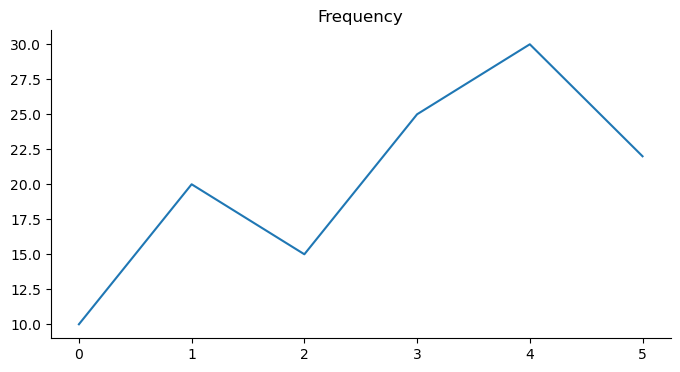

In [15]:
_df_4 = pd.DataFrame({
    'frequency': [10, 20, 15, 25, 30, 22]
})

_df_4['frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False) 
plt.show()


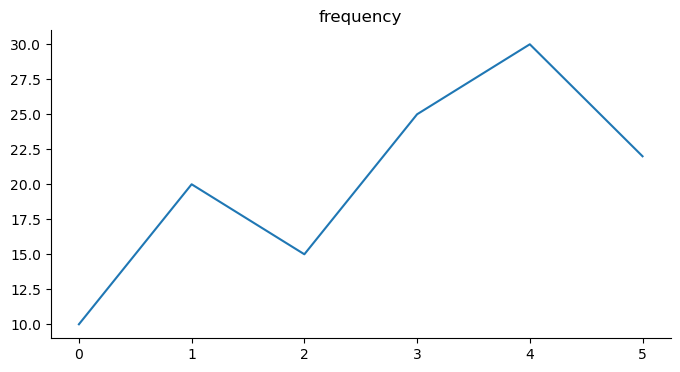

In [16]:
_df_4['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

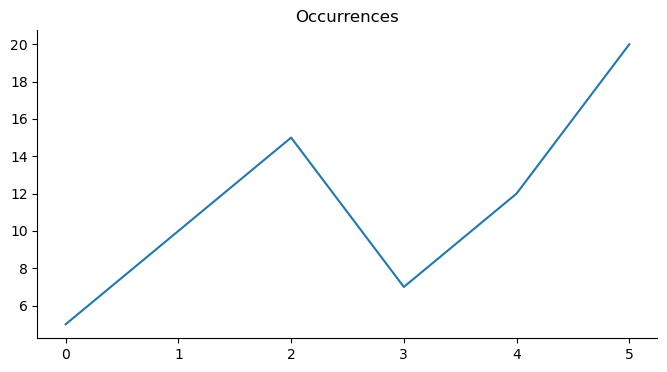

In [17]:
_df_3 = pd.DataFrame({
    'occurrences': [5, 10, 15, 7, 12, 20]
})
_df_3['occurrences'].plot(kind='line', figsize=(8, 4), title='Occurrences')
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide top and right spines (borders)
plt.show()

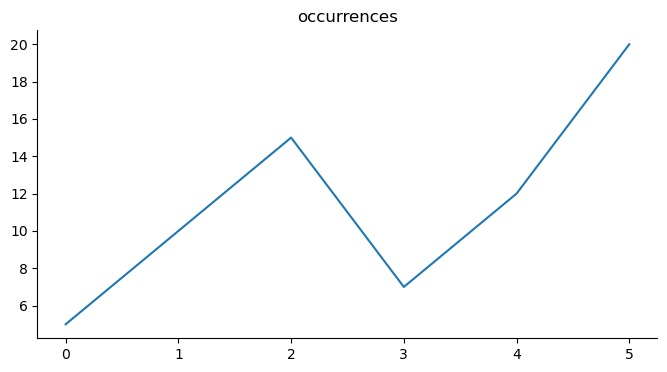

In [18]:
_df_3['occurrences'].plot(kind='line', figsize=(8, 4), title='occurrences')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(df["Data"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns = names_features)

In [20]:
df2

,able,accept,access,according,account,act,action,actions,actually,add,...,xref,yeah,year,years,yes,york,youll,young,youre,youve
0,0.0,0.053795,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.045314,0.0,0.0,0.0,0.000000,0.057375
1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.111891,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.108118,0.000000,0.000000,...,0.000000,0.333197,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.082636,0.000000
3,0.0,0.024288,0.0,0.0,0.023592,0.025378,0.127914,0.103619,0.038420,0.000000,...,0.000000,0.000000,0.018922,0.017126,0.122754,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.227837,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.038814,0.000000,0.000000,0.053550,0.000000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.000000,0.0,0.0,0.000000,0.042821,0.000000,0.000000,0.032413,0.000000,...,0.020945,0.000000,0.000000,0.028897,0.069042,0.0,0.0,0.0,0.033408,0.087420
1996,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.071218,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1997,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.096870,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1998,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.179264,0.113326,...,0.057918,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


N-gram

Bi- gram

In [21]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), 
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [22]:
top2_words = get_top_n2_words(df["Data"], n=200) 
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,apr gmt,1624
1,date apr,839
2,gmt lines,728
3,messageid date,617
4,xref cantaloupesrvcscmuedu,574


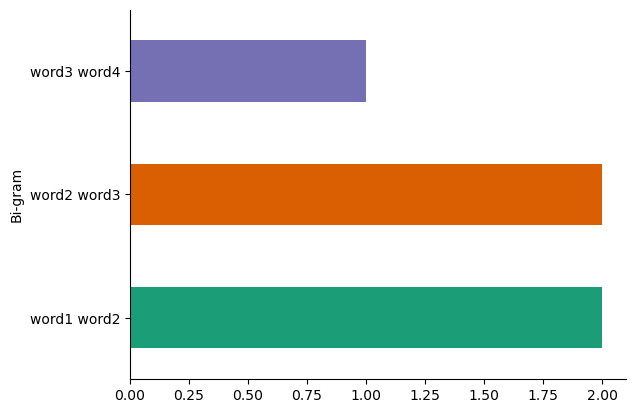

In [25]:
_df_6 = pd.DataFrame({
    'Bi-gram': ['word1 word2', 'word2 word3', 'word1 word2', 'word3 word4', 'word2 word3']
})

_df_6.groupby('Bi-gram').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False) 
plt.show()

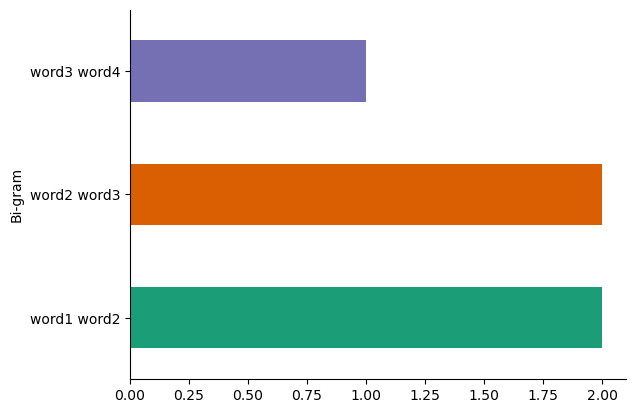

In [26]:
_df_6.groupby('Bi-gram').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

[Text(0, 0, 'apr gmt'),
 Text(1, 0, 'date apr'),
 Text(2, 0, 'gmt lines'),
 Text(3, 0, 'messageid date'),
 Text(4, 0, 'xref cantaloupesrvcscmuedu'),
 Text(5, 0, 'lines article'),
 Text(6, 0, 'references date'),
 Text(7, 0, 'messageid sender'),
 Text(8, 0, 'organization university'),
 Text(9, 0, 'writes article'),
 Text(10, 0, 'cantaloupesrvcscmuedu newsgroups'),
 Text(11, 0, 'cantaloupesrvcscmuedu path'),
 Text(12, 0, 'gmt organization'),
 Text(13, 0, 'messageid references'),
 Text(14, 0, 'gmt references'),
 Text(15, 0, 'references nntppostinghost'),
 Text(16, 0, 'fri apr'),
 Text(17, 0, 'tue apr'),
 Text(18, 0, 'date thu'),
 Text(19, 0, 'date tue')]

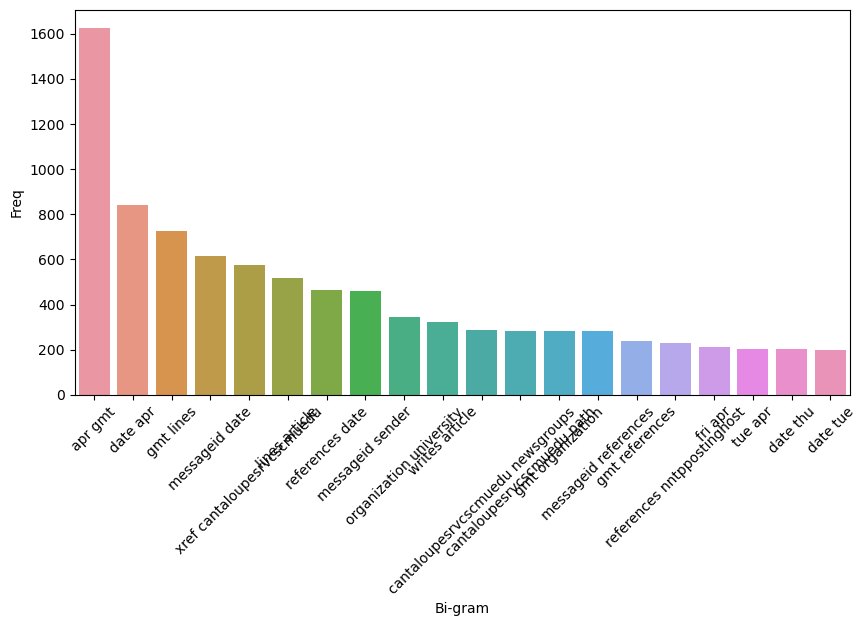

In [27]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

Tri gram

In [28]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]


In [30]:
top3_words = get_top_n3_words(df["Data"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [31]:
top3_df

,Tri-gram,Freq
0,date apr gmt,676
1,apr gmt lines,670
2,messageid date apr,452
3,gmt lines article,291
4,xref cantaloupesrvcscmuedu newsgroups,289
...,...,...
195,system organization university,15
196,computer science department,15
197,christian morality messageid,15
198,lines nntppostinghost article,15


[Text(0, 0, 'date apr gmt'),
 Text(1, 0, 'apr gmt lines'),
 Text(2, 0, 'messageid date apr'),
 Text(3, 0, 'gmt lines article'),
 Text(4, 0, 'xref cantaloupesrvcscmuedu newsgroups'),
 Text(5, 0, 'xref cantaloupesrvcscmuedu path'),
 Text(6, 0, 'apr gmt organization'),
 Text(7, 0, 'apr gmt references'),
 Text(8, 0, 'messageid references nntppostinghost'),
 Text(9, 0, 'date fri apr'),
 Text(10, 0, 'fri apr gmt'),
 Text(11, 0, 'date tue apr'),
 Text(12, 0, 'date thu apr'),
 Text(13, 0, 'tue apr gmt'),
 Text(14, 0, 'thu apr gmt'),
 Text(15, 0, 'date wed apr'),
 Text(16, 0, 'wed apr gmt'),
 Text(17, 0, 'date mon apr'),
 Text(18, 0, 'mon apr gmt'),
 Text(19, 0, 'lines messageid references')]

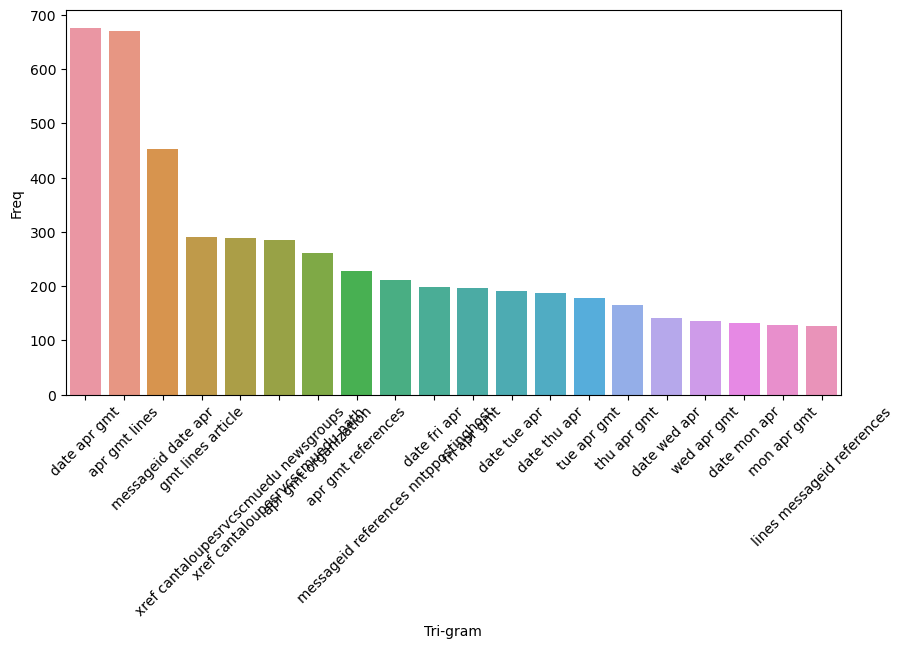

In [32]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

WordCloud

In [33]:
string_Total = " ".join(df["Data"])

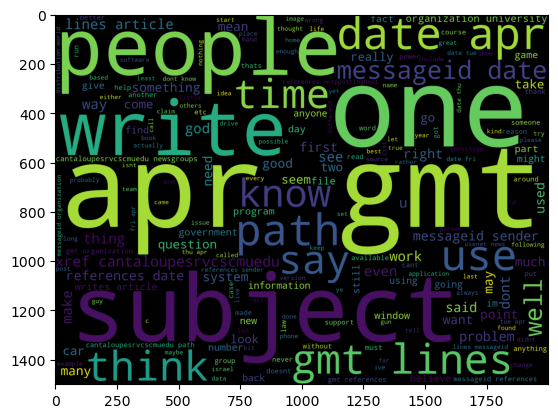

In [34]:

wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 2000,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [35]:
df

,Data,Labels
0,path frank odwyer newsgroups altatheism subjec...,alt.atheism
1,newsgroups altatheism path bilokcforumosrheedu...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path jbrownbatmanbmdtrwcom newsgroups altathei...,alt.atheism
4,xref cantaloupesrvcscmuedu newsgroups altathei...,alt.atheism
...,...,...
1995,xref cantaloupesrvcscmuedu path frank odwyer n...,talk.religion.misc
1996,xref cantaloupesrvcscmuedu newsgroups talkreli...,talk.religion.misc
1997,xref cantaloupesrvcscmuedu path cantaloupesrvc...,talk.religion.misc
1998,xref cantaloupesrvcscmuedu path cantaloupesrvc...,talk.religion.misc


In [36]:
def split_into_words(i):
    return (i.split(" "))

In [39]:
df_train,df_test = train_test_split(df,test_size=0.3)

In [40]:
df_train

,Data,Labels
1711,path backonvmshujiacil newsgroups talkpolitics...,talk.politics.mideast
556,path cantaloupesrvcscmuedumagnesiumclubcccmued...,comp.windows.x
857,path cantaloupesrvcscmuedudasnewsharvardedunoc...,rec.motorcycles
1802,xref cantaloupesrvcscmuedu newsgroups talkpoli...,talk.politics.misc
1443,xref cantaloupesrvcscmuedu newsgroups eunetmis...,sci.space
...,...,...
721,newsgroups recautos path petebreelofiitedu bre...,rec.autos
696,path cantaloupesrvcscmuedudasnewsharvardeduogi...,misc.forsale
1659,newsgroups talkpoliticsguns path cantaloupesrv...,talk.politics.guns
230,xref cantaloupesrvcscmuedu path kdbsunbarmcduk...,comp.os.ms-windows.misc


In [41]:
df_bow =CountVectorizer(analyzer=split_into_words).fit(df.Data)

In [42]:
all_blogs_matrix = df_bow.transform(df.Data)
all_blogs_matrix.shape

(2000, 39214)

In [46]:
train_blog_matrix = df_bow.transform(df_train.Data)
print(train_blog_matrix.shape)

test_blog_matrix = df_bow.transform(df_test.Data)
print(test_blog_matrix.shape)

(1400, 39214)
(600, 39214)


Naive Bayes Model

Without TFIDF matrices

preparing model on training data set

In [51]:

classifier_mb = MB()
classifier_mb.fit(train_blog_matrix,df_train.Labels)
train_pred_m = classifier_mb.predict(train_blog_matrix)
accuracy_train_m = np.mean(train_pred_m==df_train.Labels)
print(accuracy_train_m)

test_pred_m = classifier_mb.predict(test_blog_matrix)
accuracy_test_m = np.mean(test_pred_m==df_test.Labels)
print(accuracy_test_m)

0.9957142857142857
0.7683333333333333


Gaussian Naive Bayes

In [72]:
classifier_gb = GB()
classifier_gb.fit(train_blog_matrix.toarray(),df_train.Labels.values) 
accuracy_train_g = np.mean(train_pred_g==df_train.Labels)
print(accuracy_train_g )
test_pred_g = classifier_gb.predict(test_blog_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==df_test.Labels)
print(accuracy_test_g)

1.0
0.6583333333333333


Using TFIDF

In [55]:
tfidf_transformer = TfidfTransformer().fit(all_blogs_matrix)


In [56]:
train_tfidf = tfidf_transformer.transform(train_blog_matrix)
print(train_tfidf.shape)

(1400, 39214)


In [57]:
test_tfidf = tfidf_transformer.transform(test_blog_matrix)
print(test_tfidf.shape)

(600, 39214)


In [58]:
classifier_mb = MB()
classifier_mb.fit(train_tfidf,df_train.Labels)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==df_train.Labels)
print(accuracy_train_m)
test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==df_test.Labels)
print(accuracy_test_m)

0.9957142857142857
0.7766666666666666


In [60]:
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),df_train.Labels.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==df_train.Labels)
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==df_test.Labels)

In [61]:
print(accuracy_train_g)
print(accuracy_test_g)

1.0
0.6316666666666667


Evaluation

In [63]:
print("Accuracy:", accuracy_score(df_test.Labels, test_pred_m))
print("Classification Report:\n", classification_report(df_test.Labels, test_pred_m))

Accuracy: 0.7766666666666666
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.64      0.77      0.70        30
           comp.graphics       0.70      0.75      0.72        28
 comp.os.ms-windows.misc       0.92      0.59      0.72        37
comp.sys.ibm.pc.hardware       0.57      0.70      0.63        30
   comp.sys.mac.hardware       0.86      0.86      0.86        29
          comp.windows.x       0.92      0.65      0.76        34
            misc.forsale       0.75      0.88      0.81        24
               rec.autos       1.00      0.79      0.88        29
         rec.motorcycles       0.88      0.88      0.88        25
      rec.sport.baseball       0.45      0.95      0.61        19
        rec.sport.hockey       1.00      0.88      0.93        32
               sci.crypt       0.97      0.82      0.89        39
         sci.electronics       0.58      0.96      0.72        23
                 sci.m

Sentiment Analysis

In [69]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Data'].apply(get_sentiment)


In [71]:
sentiment_dist = df.groupby('Labels')['Sentiment'].value_counts(normalize=True)
print(sentiment_dist)

Labels                    Sentiment
alt.atheism               Positive     0.65
                          Negative     0.35
comp.graphics             Positive     0.73
                          Negative     0.27
comp.os.ms-windows.misc   Positive     0.76
                          Negative     0.24
comp.sys.ibm.pc.hardware  Positive     0.81
                          Negative     0.19
comp.sys.mac.hardware     Positive     0.74
                          Negative     0.26
comp.windows.x            Positive     0.77
                          Negative     0.21
                          Neutral      0.02
misc.forsale              Positive     0.79
                          Negative     0.21
rec.autos                 Positive     0.76
                          Negative     0.24
rec.motorcycles           Positive     0.71
                          Negative     0.29
rec.sport.baseball        Positive     0.65
                          Negative     0.35
rec.sport.hockey          Positive     0